# <center>Report

#### <div style="text-align: right"> 학번 : 21512171 &ensp; &ensp; 이름 : 김도현

gitHub : 
https://github.com/DunkHimYo/camera_calibration

In [9]:
import cv2
import numpy as np
import os

## Image Test

In [10]:
wc = 10  ## 체스 보드 가로 패턴 개수 - 1
hc = 7  ## 체스 보드 세로 패턴 개수 - 1
objp = np.zeros((wc * hc, 3), np.float32)
objp[:, :2] = np.mgrid[0:wc, 0:hc].T.reshape(-1, 2)

In [12]:
def find_corners(image):
    objpoints=[]  # 3d co-ordinate
    imagepoints=[] # 2d co-ordinate
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (wc, hc), None)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if ret == True:
        objpoints.append(objp)
        imagepoints.append(corners)
        image = cv2.drawChessboardCorners(image, (wc, hc), corners,ret)
        return image
    else:
        return image

### Using images

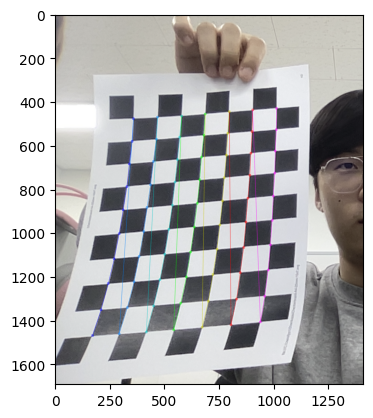

In [13]:
import matplotlib.pyplot as plt
image=cv2.imread('chess2.png')
image=find_corners(image)
plt.imshow(image)
plt.show()

### To Find Camera Matrix, Distortion Coefficient,  Rotational and transverse Vector

In [14]:
im_shape=(640,480)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imagepoints,im_shape,None,None)

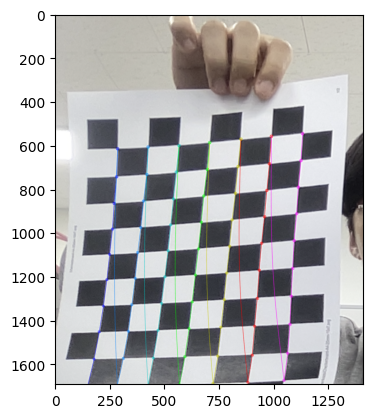

In [15]:
h, w = image.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 0)
image = cv2.undistort(image, mtx, dist, None, newcameramtx)
plt.imshow(image)
plt.show()

## Project

chk1
chk1


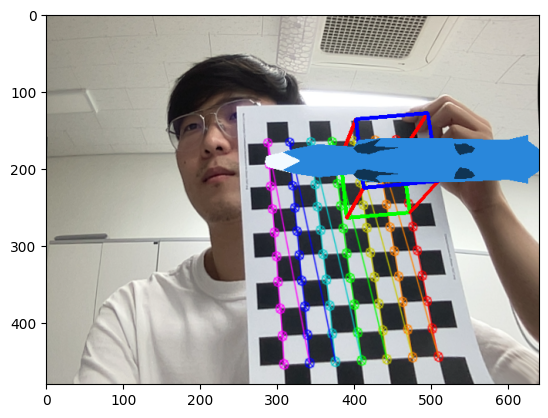

In [8]:
import calibration
import matplotlib.pyplot as plt
import matplotlib.animation as animation

if __name__=='__main__':
    cali=calibration.Applications()

    def ani(i):

        frame=cali.run(draws=['cube','fox'])
        #설정한 대상 물체 출력
        return plt.imshow(frame, animated=True),

    fig = plt.figure()
    anime = animation.FuncAnimation(fig, ani, interval=1, blit=True)
    #Cube안에 여어 잡기 이며 Jupyter 특성상 동영상 출력이 이미지로 추력됨
    plt.show()